# Salary Prediction Based on Country and Race
This project aims to predict individuals' salaries from various countries and races based on their demographics, such as occupation, age, gender, experience, education, and more. The dataset, sourced from Kaggle, consists of 32,561 rows and 15 columns, including 8 independent variables and 1 target variable, which is the salary.

## About the Dataset
The dataset contains extensive salary and demographic information, including years of experience. It is a valuable resource for analyzing the relationship between income and various socio-demographic factors. The demographic attributes include age, gender, education, country, and race, offering a diverse range of variables for analysis. Researchers can explore income distribution patterns across different demographic categories, gaining insights into potential disparities or variations in earning potential.

Furthermore, the dataset includes years of experience, allowing investigations into the impact of professional tenure on salary levels. This aspect adds a dynamic dimension to the analysis, enabling researchers to examine how income varies based on both demographic characteristics and accumulated work experience. The dataset provides a rich opportunity for comprehensive studies on income diversity and understanding the multifaceted factors influencing earning potential in today's workforce.

### Data Dictionary

| Column             | Description                          |
|--------------------|--------------------------------------|
| Unnamed: 0         | Index                                 |
| Age                | Age of the employee                   |
| Education Level    | Education level of the employee       |
| Job Title          | Job title of the employee             |
| Years of Experience| Years of experience of the employee   |
| Salary             | Salary of the employee                |
| Country            | Country of the employee               |
| Race               | Race of the employee                  |


### Loading libraries and importing data

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df = pd.read_csv('Salary_Data.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


## Data Preprocessing

In [3]:
# Checking the shape of the data
df.shape

(6704, 9)

In [4]:
# Checking for null or missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Since the number of rows with null values is almost negligible, I will drop all these rows with null values.

In [5]:
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [6]:
# Dropping the index column
df.drop(columns = 'Unnamed: 0',axis = 1, inplace = True)

Checking the datatype in each column

In [7]:
#Checking the datatypes for each column
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

Checking the unique values present in each column

In [8]:
# Number of unique values in each column
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [9]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

The job title column has 191 different values which makes it difficult to analyze so many job titles. So, I will group the job titles under similar job domains.

### Grouping the Job Titles

In [10]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower()
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [11]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

### Grouping the Education Level
Since the education levels are represented in two ways for each education level, I will group the relevant levels together.

In [12]:
def group_education_level(Education):
    Education = str(Education).lower()
    if 'high school' in Education:
        return 'High School'
    elif 'bachelor\'s' in Education:
        return 'Bachelors'
    elif 'master\'s' in Education:
        return 'Masters'
    elif 'phd' in Education:
        return 'PHD'

df['Education Level'] = df['Education Level'].apply(group_education_level)

## Descriptive Statistics

In [13]:
#descriptive statistics
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [14]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PHD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


## Exploratory Data Analysis
In the exploratory data analysis phase, I will start by examining the dataset to gain an initial understanding of the data. First, I will analyze the distribution of the data across the dataset. Next, I will visualize the data to uncover the relationships between the features and the target variable.

### Distribution of Gender 

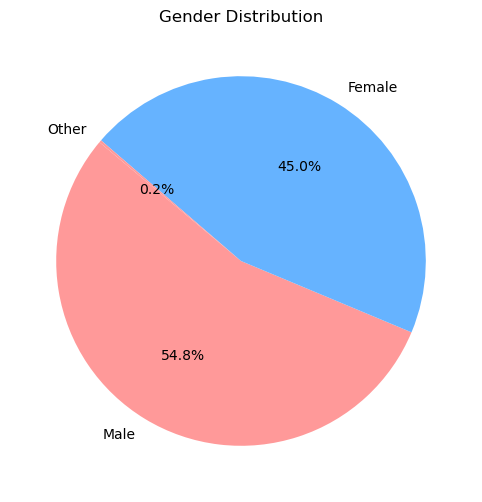

In [15]:
#Pie chart showing the percentage of male and females in the data
plt.figure(figsize = (10,6))
plt.pie(df['Gender'].value_counts(),labels= ['Male', 'Female', 'Other'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

### Age Distribution

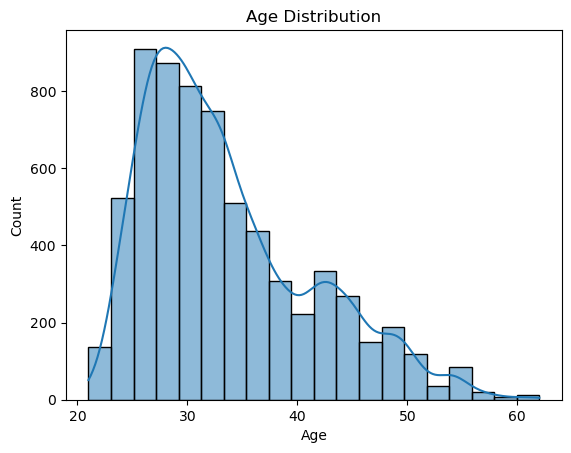

In [16]:
# Plot a histogram of the age groups
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Most employees are between the ages of 25 and 35, indicating that the workforce is predominantly young and energetic. There are very few older employees in the dataset, specifically those over 55 years of age.

### Education Level

<Axes: xlabel='Education Level', ylabel='count'>

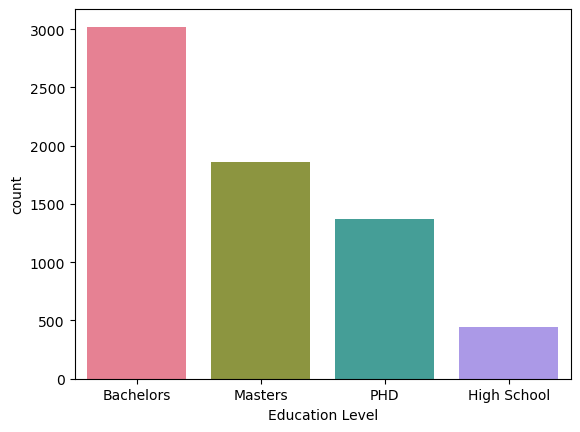

In [17]:
# Bar Chart to show the various education level
sns.countplot(x = 'Education Level', data = df, palette = 'husl')

Most employees hold a Bachelor's degree, followed by those with a Master's degree and a Doctoral degree. The fewest employees have only a High School education. The graph clearly indicates that the majority of employees began working after completing their Bachelor's degree, with fewer starting their careers after obtaining a Master's degree, and even fewer pursuing a Doctorate. The smallest group of employees started working right after high school.

### Job Title

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Manager/Director/VP'),
  Text(2, 0, 'Data Analyst/Scientist'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Marketing/Social Media'),
  Text(6, 0, 'HR/Human Resources'),
  Text(7, 0, 'Product/Designer'),
  Text(8, 0, 'Customer Service/Receptionist'),
  Text(9, 0, 'IT/Technical Support'),
  Text(10, 0, 'Financial/Accountant'),
  Text(11, 0, 'Operations/Supply Chain')])

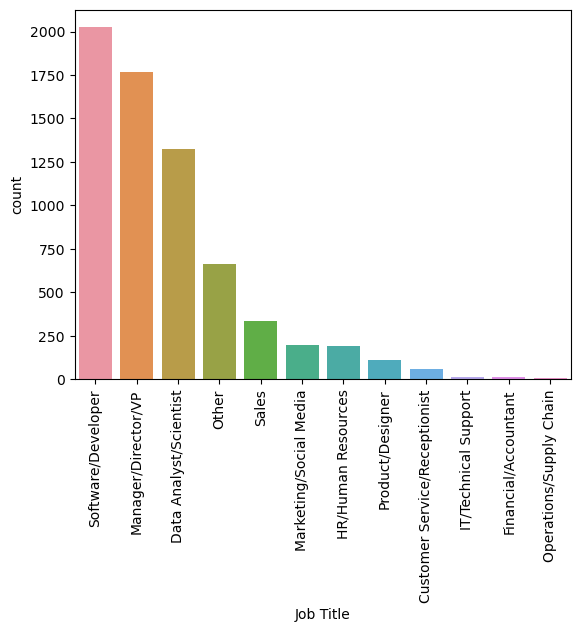

In [18]:
sns.countplot(x='Job Title', data = df, order = df['Job Title'].value_counts().index)
plt.xticks(rotation=90)

This graph simplifies the data on job titles. It shows that the majority of employees hold positions such as Software Developer, Data Analyst/Scientist, or Manager/Director/VP. There are fewer employees with job titles in sales, marketing/social media, HR, product design, and customer service. A very small number of employees work in finance/accounting or operations/supply management.

From this, I hypothesize that job titles like Software Developer, Data Analyst/Scientist, and Manager/Director are in higher demand compared to other roles. It also suggests that positions like finance/accounting, operations/supply management, and customer service are less in demand and may offer lower compensation.

### Racial Distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Korean'),
  Text(3, 0, 'Australian'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Black'),
  Text(6, 0, 'African American'),
  Text(7, 0, 'Mixed'),
  Text(8, 0, 'Welsh'),
  Text(9, 0, 'Hispanic')])

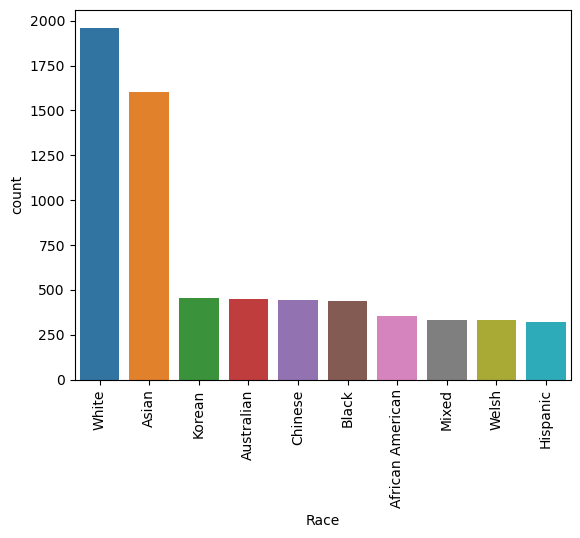

In [19]:
sns.countplot(x='Race', data=df, order = df['Race'].value_counts().index)
plt.xticks(rotation=90)

This graph provides insights into the racial distribution within the dataset. It reveals that the majority of employees are either White or Asian, followed by Korean, Chinese, Australian, and Black. There are fewer employees from Welsh, African American, Mixed, and Hispanic backgrounds compared to other groups.
 

### Country

<Axes: xlabel='Country', ylabel='count'>

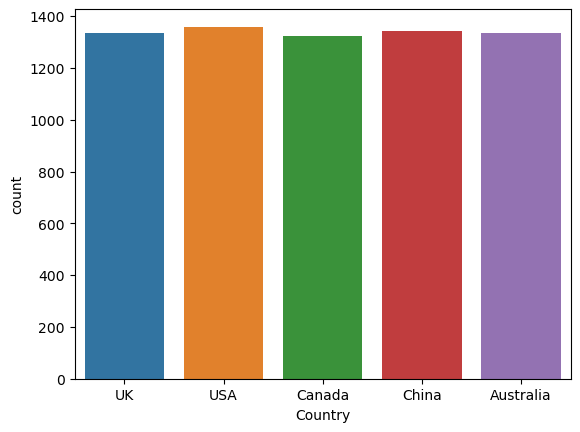

In [20]:
sns.countplot(x='Country',data=df)
#plt.xticks(rotation=90)

The number of employees from the above 5 countries is nearly same, with USA having the highest number.

### Years of Experience

<Axes: xlabel='Years of Experience', ylabel='Count'>

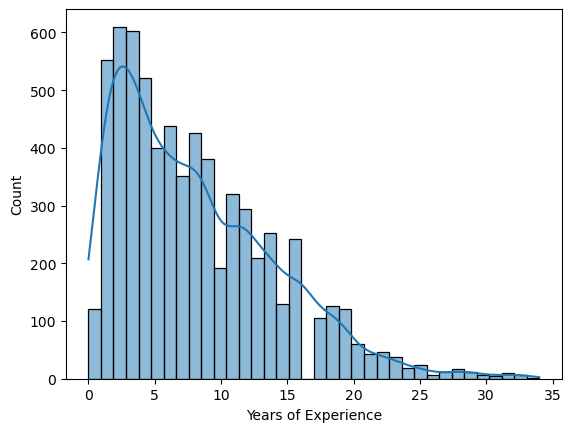

In [21]:
#istogram to show the years of experience
sns.histplot(x = 'Years of Experience', data = df, kde=True)

The majority of employees in the dataset have 0-7 years of experience in their respective fields, with most having less than 5 years of experience. Additionally, the number of employees decreases as the years of experience increase.

From these visualizations, we gain a clear understanding of the data, its distribution, and the quantities of each category. Next, I will explore the relationship between these independent variables and the target variable, Salary.

### Gender and Salary

Text(0.5, 1.0, 'Gender vs Salary')

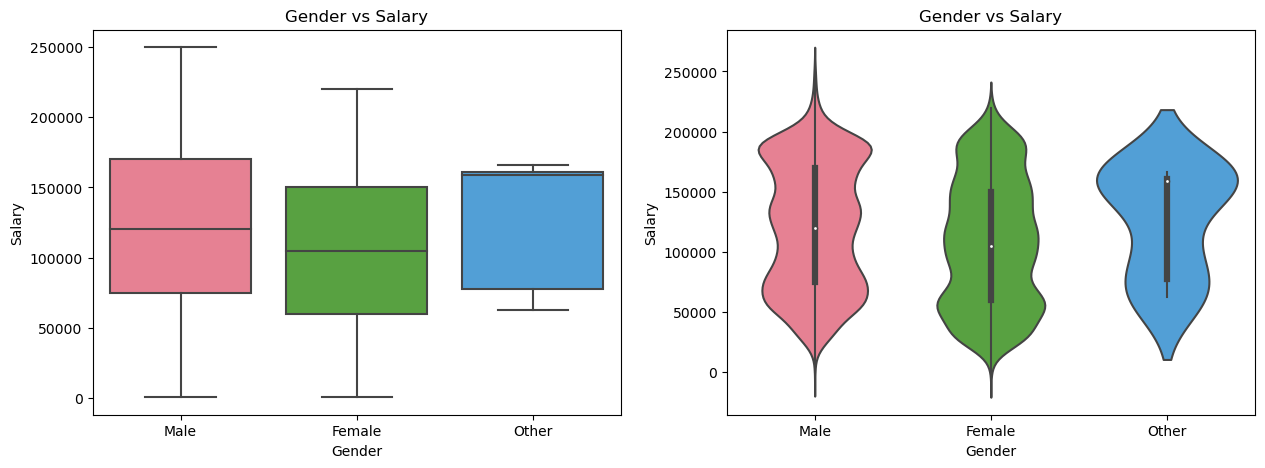

In [22]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(x = 'Gender', y = 'Salary', data = df, palette = 'husl', ax = ax[0]). set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, palette = 'husl',  ax =ax[1]).set_title('Gender vs Salary')

The boxplot and violin plot illustrate the salary distribution across the three genders. According to the boxplot, employees identifying as "Other" have significantly higher salaries compared to males and females, with a median salary above 150,000. Males have a median salary around 107,500, while females have a median salary close to 100,000.

The violin plot provides a detailed visualization of salary distribution by gender. For the "Other" gender, most employees earn salaries above 150,000. For males, the salary distribution is concentrated between 50,000 and 100,000, with another peak near 200,000. Female employees show a more spread-out salary distribution, with most salaries clustering around 50,000.

### Age and Salary

Text(0.5, 1.0, 'Age vs Salary')

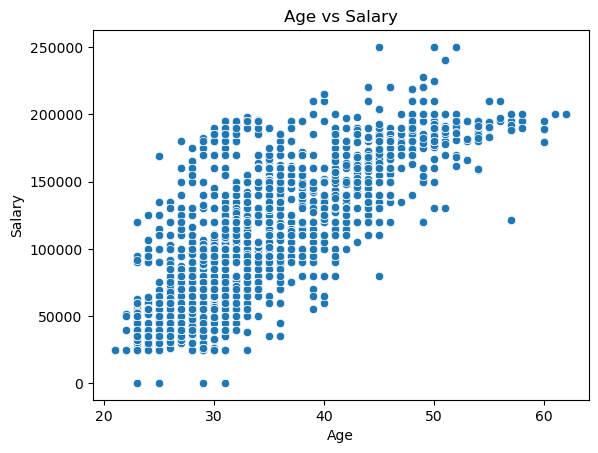

In [23]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

The scatter plot reveals a trend where salaries tend to increase with age, which is expected due to promotions and appraisals over time. However, a closer look shows that individuals of the same age can have varying salaries, indicating that other factors also influence salary levels.

### Education Level and Salary

Text(0.5, 1.0, 'Gender vs Salary')

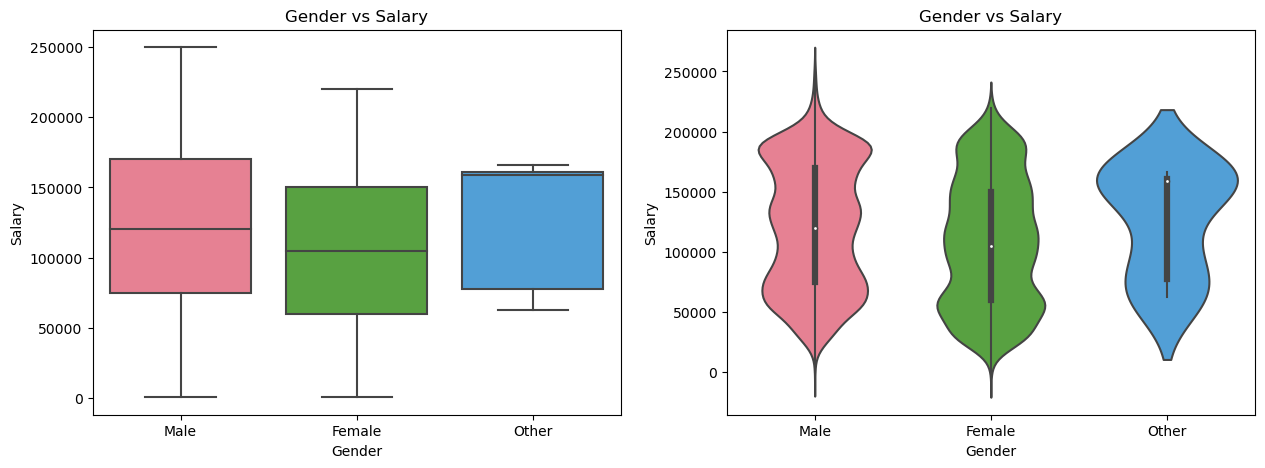

In [24]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, palette = 'husl',  ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, palette = 'husl', ax =ax[1]).set_title('Gender vs Salary')

The boxplot and violin plot illustrate the salary distribution based on the employees' education levels. The median salary is highest for PhD holders, followed by those with Master's and Bachelor's degrees, while employees without a degree have the lowest median salary.

In the violin plot, PhD holders' salaries are concentrated around 200,000. Master's degree holders show a narrow distribution with salaries ranging from 100,000 to 150,000. Bachelor's degree holders have a salary distribution centered around 50,000, whereas employees without a degree have salaries mainly between 40,000 and 45,000.

From these graphs, it can be inferred that employees with higher education levels tend to have higher salaries compared to those with lower education levels.

### Job Title and Salary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

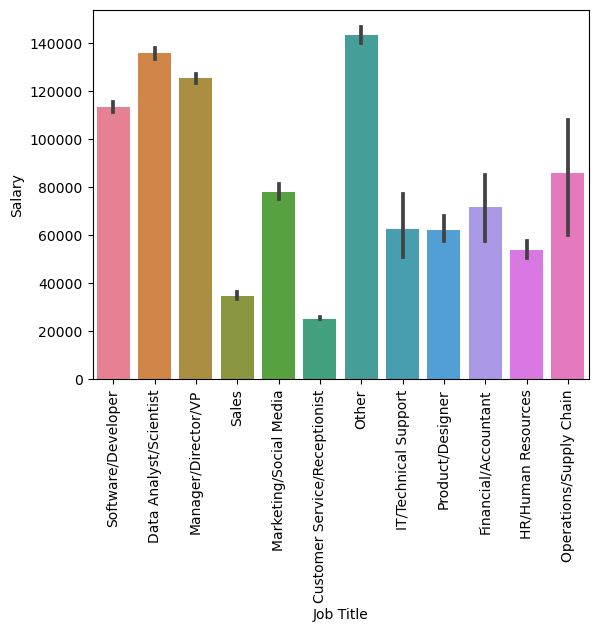

In [25]:
sns.barplot(x = 'Job Title', y = 'Salary', data = df, palette = 'husl')
plt.xticks(rotation = 90)

This graph challenges my earlier hypothesis regarding the demand and pay associated with job titles. Contrary to my assumption, job titles in the 'Other' category exhibit higher salaries than those I initially believed to be in high demand and well-paid. This indicates that there is no direct correlation between job title distribution and salary. The job titles that offer high salaries tend to be fewer in number.

However, the hypothesis holds true for job titles such as Software Developer, Data Analyst/Scientist, and Manager/Director/VP, which are indeed in high demand and offer competitive pay. In contrast, job titles like Operations/Supply Chain, HR, Financial/Accountant, and Marketing/Social Media also offer higher salaries than initially assumed.

### Experience and Salary

Text(0.5, 1.0, 'Years of Experience vs Salary')

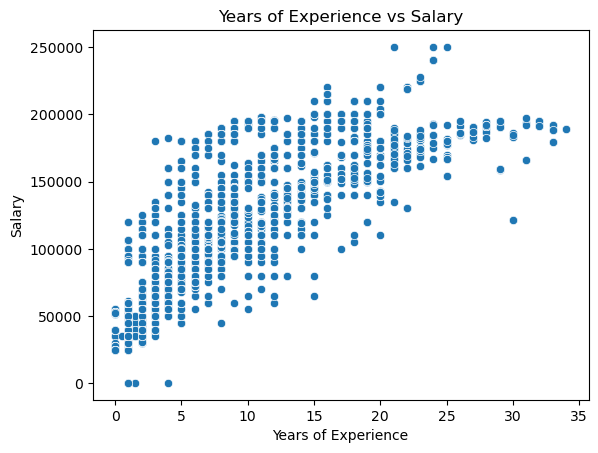

In [26]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary')

From this scatter plot, it is evident that overall, employee salaries tend to increase with years of experience. However, a closer examination reveals that employees with similar years of experience can have varying salaries. This variation is due to other influencing factors such as job title, age, gender, and education level, as previously discussed.

### Country and Salary

<Axes: xlabel='Country', ylabel='Salary'>

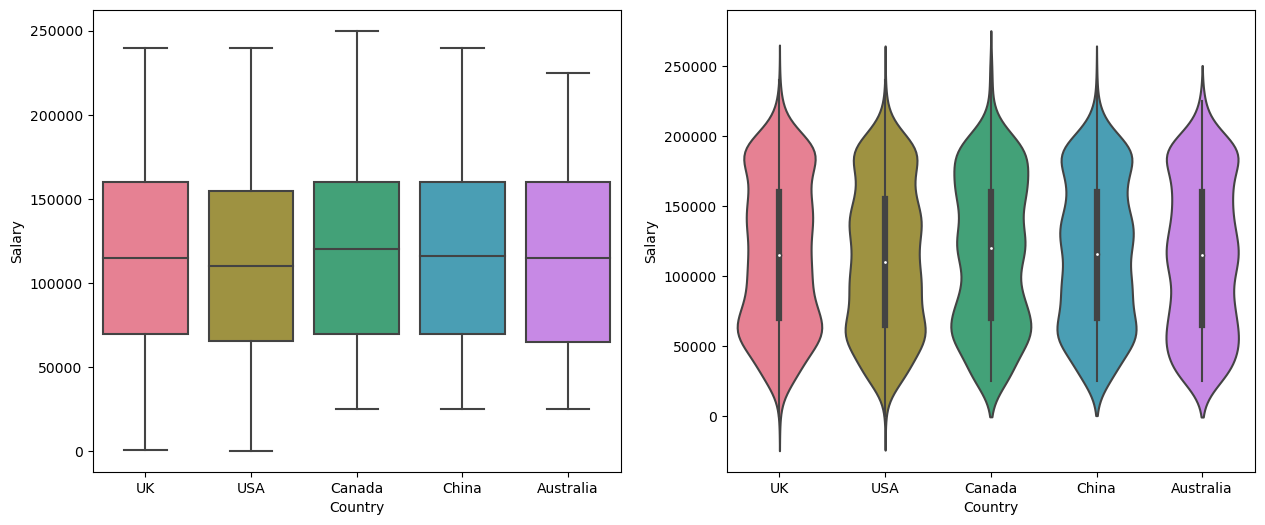

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, palette = 'husl',  ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, palette = 'husl', ax=ax[1])

Both the boxplot and violin plot provide similar insights regarding salary distribution across various countries, even in the distribution shown by the violin plot. However, there is a slight variation in the median salary in the USA, which is marginally lower compared to other countries.

Given the limited information about salary differences between countries, I will plot a job title versus salary graph for each country. This will help us gain a clearer overview of the relationship between job titles and salaries within each country.








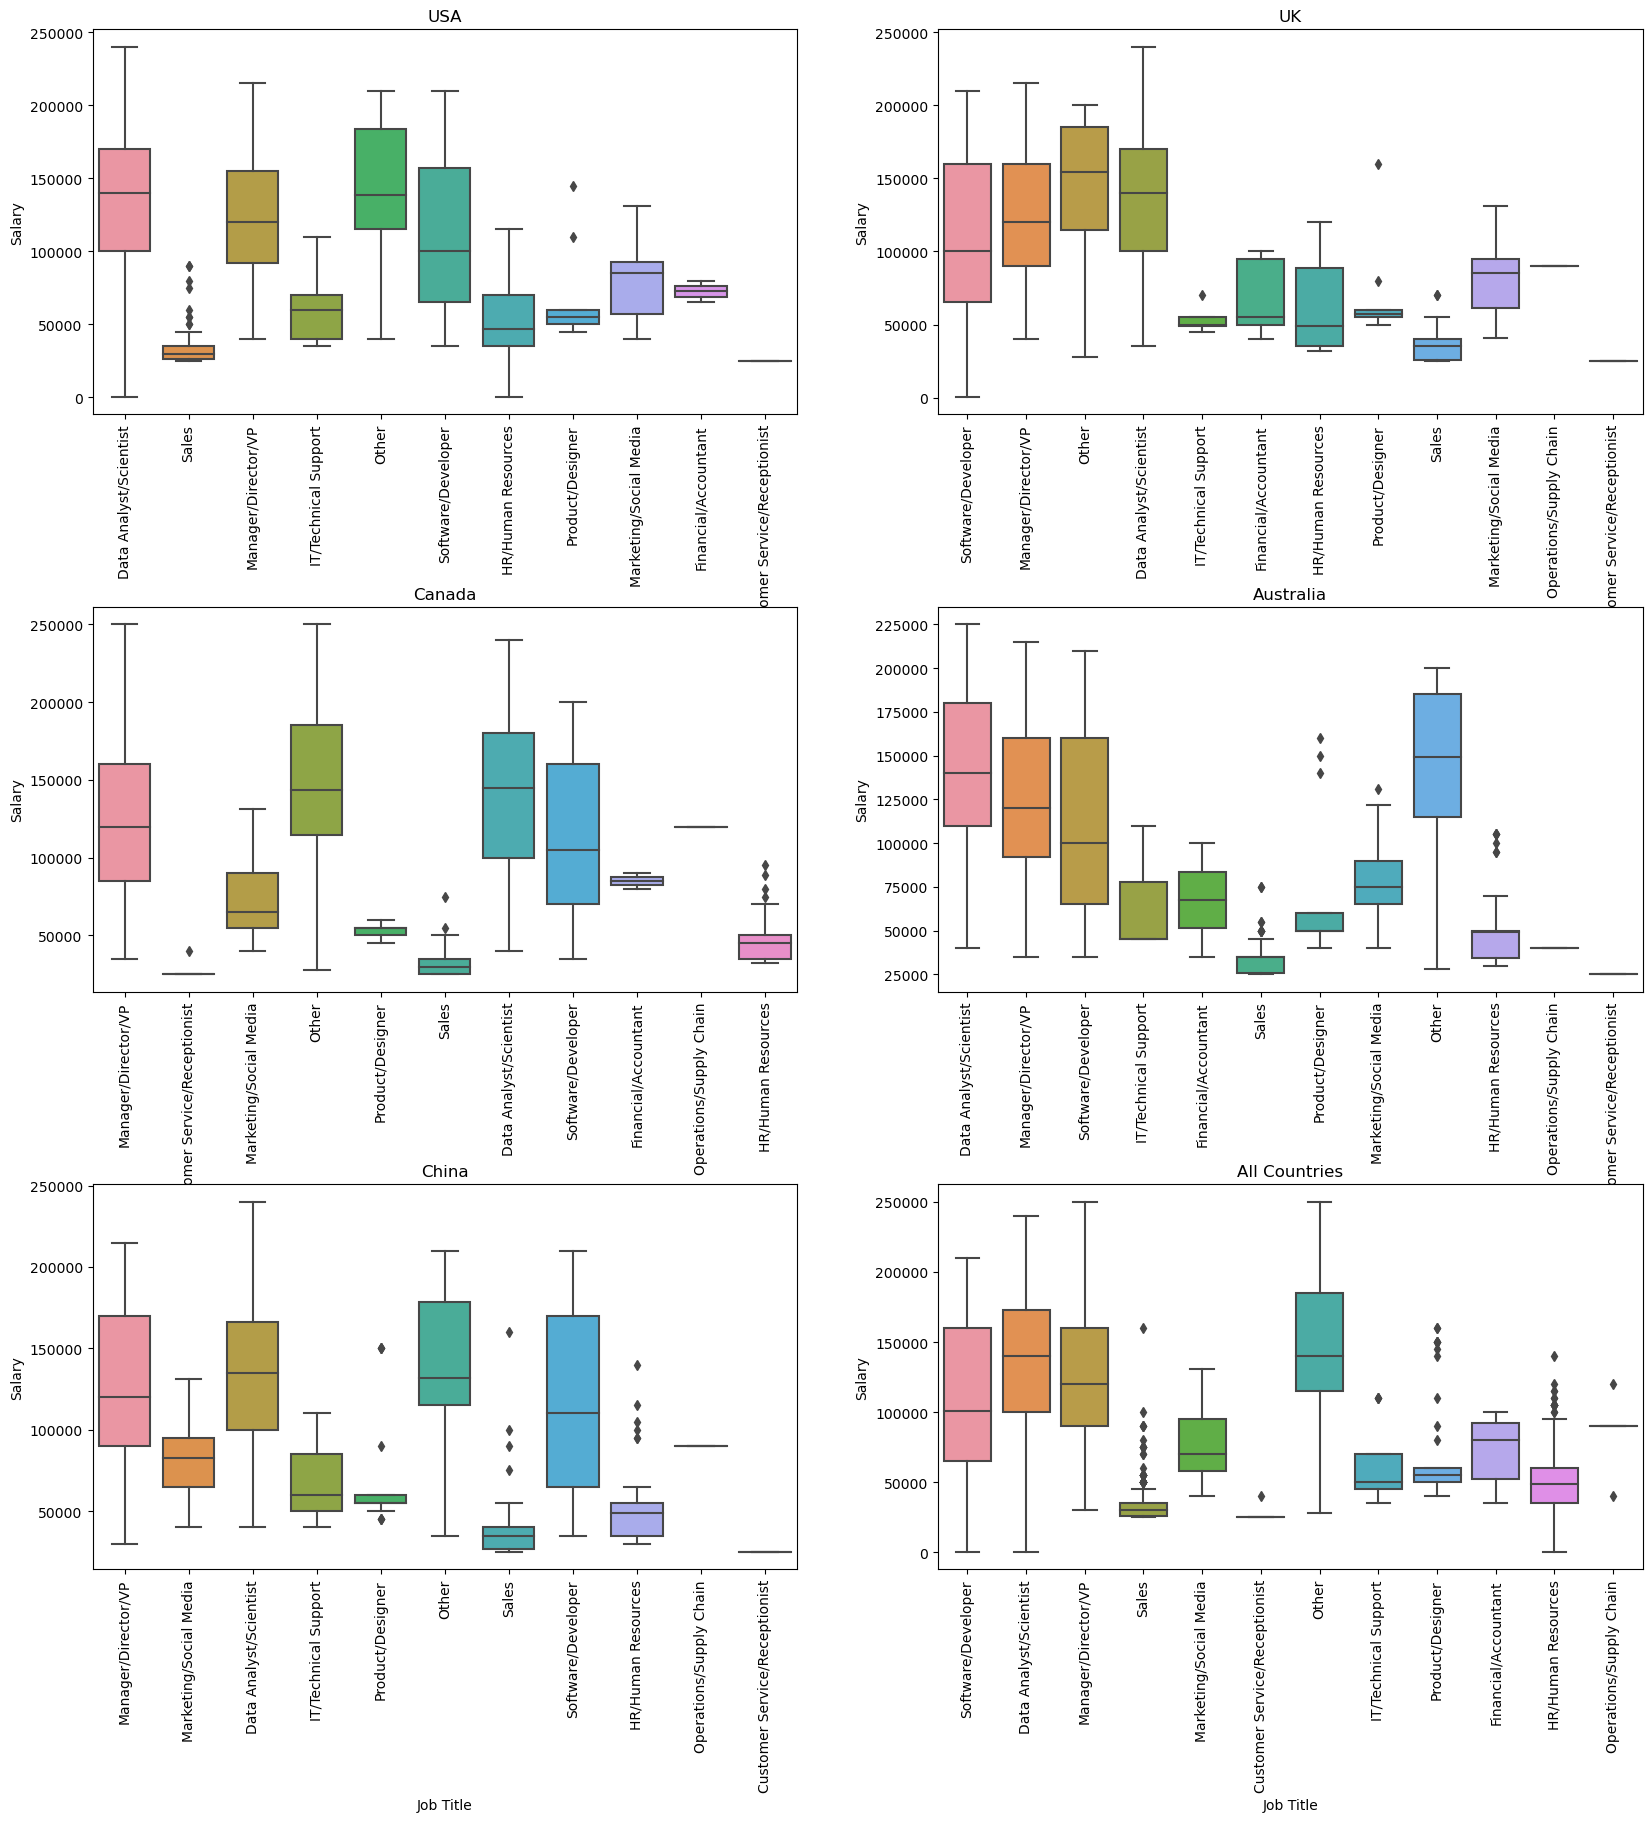

In [28]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

After analyzing these plots, I conclude that job titles such as Software Developer, Manager/Director/VP, and Data Analyst/Scientist are in high demand and receive significantly higher salaries compared to other job titles, excluding those classified under the 'Other' category. Conversely, job titles such as Operations/Supply Chain, Customer Service/Receptionist, Product Designer, and Sales are in lower demand and tend to offer lower salaries.

### Race and Salary

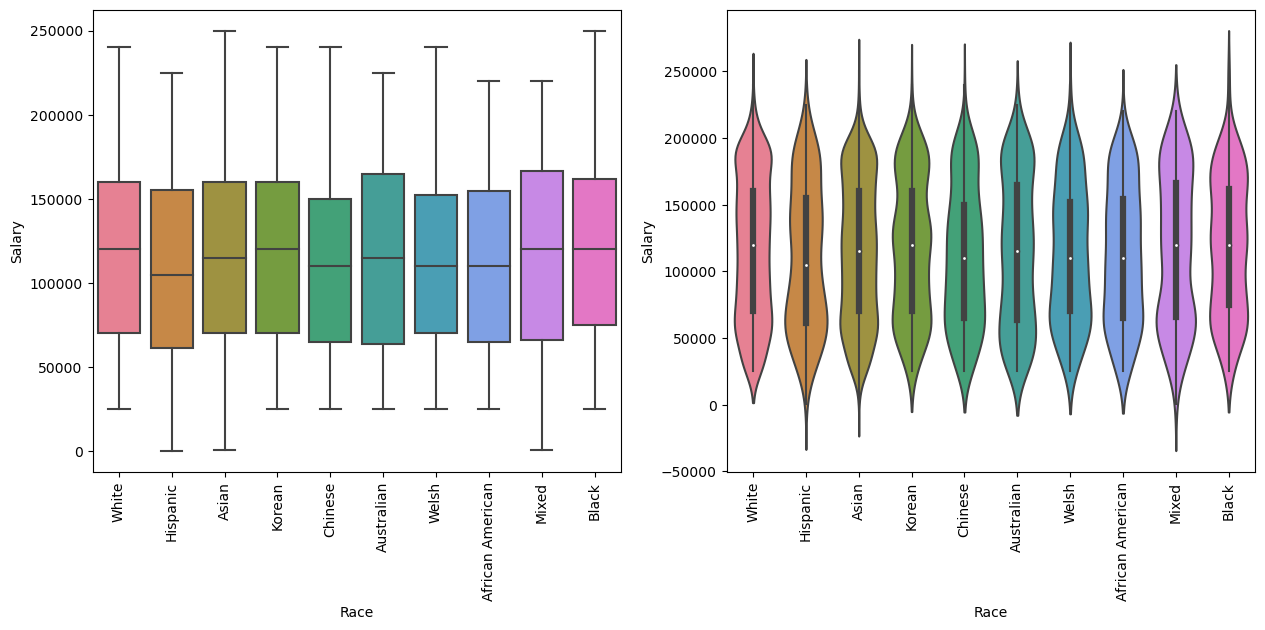

In [29]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, palette = 'husl', ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, palette = 'husl', ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)

Employees from Australian, Mixed, Black, and White races have the highest median salaries, followed by Asian, Korean, and Chinese employees, with Hispanic employees having the lowest median salary. The violin plot shows that salary distribution is more concentrated above 150k for White, Australian, Black, and Mixed races. In contrast, Hispanic employees have a higher concentration of salaries around 75k.

## Data Preprocessing 2

### Label Encoding of Categorical Features

In [30]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
label_encoder = LabelEncoder()
for feature in features:
    label_encoder.fit(df[feature].unique())
    df[feature] = label_encoder.transform(df[feature])
    print(feature, df[feature].unique())


Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


### Normalization

In [31]:
# Normalizing continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [32]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


### Correlation Matrix

<Axes: >

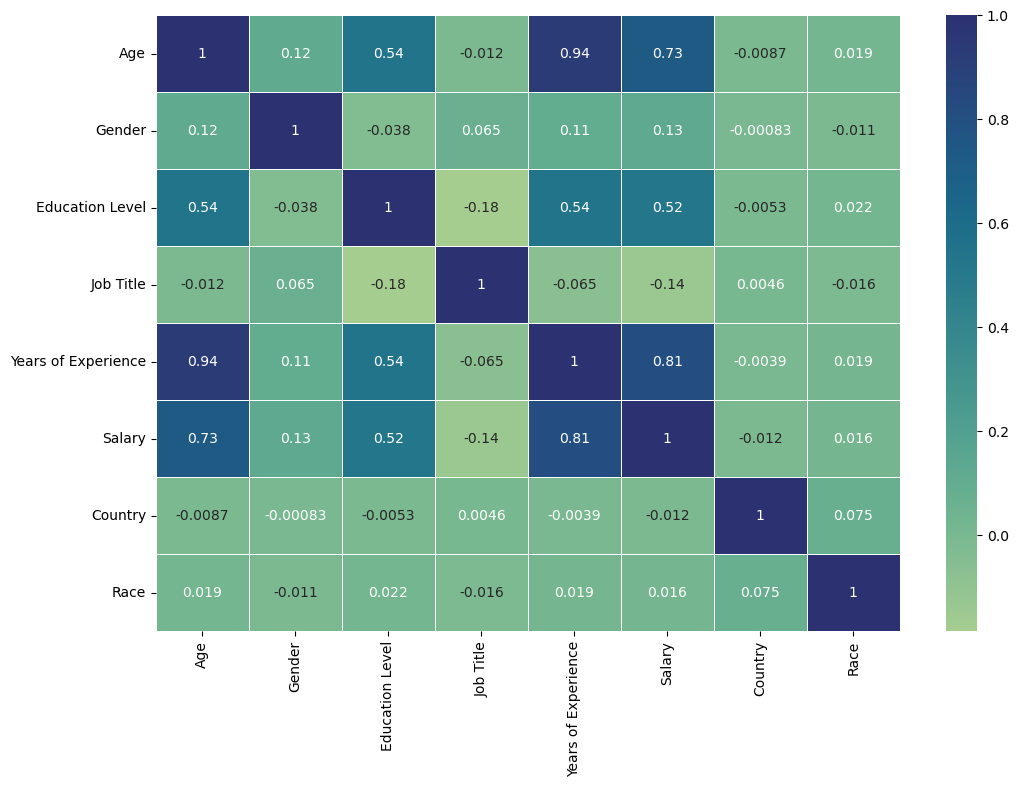

In [33]:
#Checking correlation with a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linewidth=.5, cmap='crest')

The correlation matrix highlights three significant correlations:

   * Salary and Age
   * Salary and Years of Experience
   * Years of Experience and Age
   
The correlations between salary and both age and years of experience have already been explored in the previous plots. The correlation between years of experience and age is expected, as individuals typically gain more experience as they age.








### Splitting Data for Validation

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

## Salary Prediction

I will be using the following models:

 * Decision Tree Regressor
 * Random Forest Regressor

## Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters for the grid search
parameters = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': [None, 'sqrt', 'log2'], 
    'random_state': [0, 42]
}

# Creating the grid search object
grid_search = GridSearchCV(dtree, parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print(grid_search.best_params_)


{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


Choosing the best parameters to build the model.

In [37]:
dtree = DecisionTreeRegressor(max_depth = 10, max_features = None, min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=8,
                      random_state=42)

In [38]:
#Using the training data to fit the model
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=8,
                      random_state=42)

In [39]:
#checking accuracy of the model
dtree.score(X_train, y_train)

0.9656459784687974

In [40]:
#using the model to predict the salary of an employee 
d_pred = dtree.predict(X_test)

### Evaluating the Decision Tree Regressor Model

In [41]:
dft = pd.DataFrame({'Actual': y_test,'Predicted': d_pred})
dft.reset_index(drop = True, inplace = True)
dft.head(10)

,Actual,Predicted
0,0.656819,0.678470
1,-0.745659,-0.688434
2,-0.290405,-0.290405
3,-1.048183,-1.036343
4,-0.669294,-0.610093
5,1.414598,1.494747
6,-0.820850,-0.715794
7,-1.142906,-1.122777
8,1.509320,1.554189
9,0.277930,0.287811


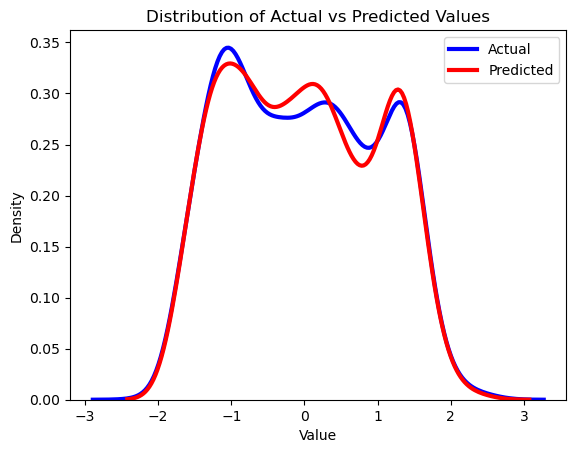

In [42]:
# Plotting the distribution of the 'Actual' values
ax = sns.kdeplot(
    dft['Actual'],    # Selecting the 'Actual' column from the DataFrame
    color='blue',     # Setting the color of the KDE curve to blue
    linewidth=3,      # Setting the linewidth of the KDE curve to 3
    label='Actual'    # Labeling this KDE curve as 'Actual'
)

# Plotting the distribution of the 'Predicted' values on the same axes
sns.kdeplot(
    dft['Predicted'],  # Selecting the 'Predicted' column from the DataFrame
    color='red',       # Setting the color of the KDE curve to red
    linewidth=3,       # Setting the linewidth of the KDE curve to 3
    label='Predicted', # Labeling this KDE curve as 'Predicted'
    ax=ax              # Plotting on the same axes as the previous plot
)

# Adding a title to the plot
plt.title('Distribution of Actual vs Predicted Values')

# Adding labels to the axes
plt.xlabel('Value')
plt.ylabel('Density')

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()


The blue line represents the distribution of actual values, while the red line represents the distribution of predicted values. The predicted values closely align with the actual values, and their curves overlap significantly. This indicates that the model is a good fit.

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate and print the R2 Score
print("R2 Score: ", r2_score(y_test, d_pred))
# R2 Score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 indicates a better fit.

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
# MSE measures the average squared difference between the actual and predicted values. Lower values indicate better model performance.

# Calculate and print the Mean Absolute Error (MAE)
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
# MAE measures the average absolute difference between the actual and predicted values. Lower values indicate better model performance.

# Calculate and print the Root Mean Squared Error (RMSE)
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))
# RMSE is the square root of the MSE and provides an indication of the average error magnitude. Lower values indicate better model performance.


R2 Score:  0.9323013355107719
Mean Squared Error:  0.06928069008068977
Mean Absolute Error:  0.13812719621413622
RMSE: 0.2632122529075912


## Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
# creating random forest regressor
rfg = RandomForestRegressor()

In [45]:
#Model training
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
#checking model accuracy
rfg.score(X_train, y_train)

0.9881399363251554

In [47]:
#using the model to predict the salary
r_pred = rfg.predict(X_test)

### Evaluating the Random Forest Regressor Model

In [48]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop = True, inplace = True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.652869
1,-0.745659,-0.692622
2,-0.290405,-0.303666
3,-1.048183,-1.049699
4,-0.669294,-0.651928
5,1.414598,1.501553
6,-0.820850,-0.805457
7,-1.142906,-1.112010
8,1.509320,1.536499
9,0.277930,0.312925


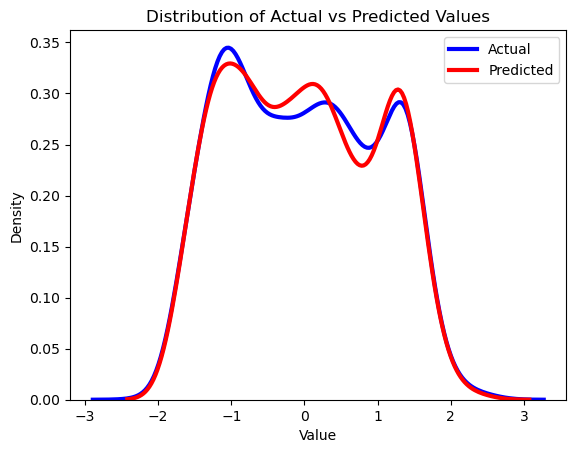

In [49]:
# Plotting the KDE (Kernel Density Estimate) for the 'Actual' values
ax = sns.kdeplot(
    dft['Actual'],        # Selecting the 'Actual' column from the DataFrame
    color='blue',         # Setting the color of the KDE curve to blue
    linewidth=3,          # Setting the linewidth of the KDE curve to 3
    label='Actual'        # Labeling this KDE curve as 'Actual'
)

# Plotting the KDE for the 'Predicted' values on the same axes
sns.kdeplot(
    dft['Predicted'],     # Selecting the 'Predicted' column from the DataFrame
    color='red',          # Setting the color of the KDE curve to red
    linewidth=3,          # Setting the linewidth of the KDE curve to 3
    label='Predicted',    # Labeling this KDE curve as 'Predicted'
    ax=ax                 # Plotting on the same axes as the previous plot
)

# Adding a title to the plot
plt.title('Distribution of Actual vs Predicted Values')

# Adding labels to the axes
plt.xlabel('Value')
plt.ylabel('Density')

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()


The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [50]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9471103657105913
Mean Squared Error:  0.05412559301326517
Mean Absolute Error:  0.11478700220646777
RMSE: 0.23264907696628667


## Conclusion

From the exploratory data analysis, it is evident that employee salaries are influenced by several key factors:

 - Years of Experience
 - Job Title
 - Education Level
 
Employees with more years of experience, job titles such as Data Analyst/Scientist, Software Developer, or Director/Manager/VP, and those holding a Master's or Doctoral degree tend to have higher salaries.

For the machine learning models, I employed regressor models—Decision Tree Regressor and Random Forest Regressor—to predict salaries. The Random Forest Regressor performed exceptionally well, achieving an accuracy of 94.6%.